# Support Vector Regression (SVR)

A ideia é muito parecida com o SVR.

Mais difícil para fazer previsões.

Possui o parâmetro epsilon
+ Penalidade para o valor real

Lembrando que a ideia é encontrar o melhor hiperplano, 

**SVR Kernel**

Da mesma forma que a classificaçâo, temos o Kernelt trick, para altarar a dimensionalidade e asism encontar rmelhor o hiperplano para **PROBLEMAS NÂO LINEARES**

---

Nos nossos exemplos, vamos motrar diversos kernels diferentes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "../../files/"

## Base `plano-saude2`

In [4]:
base = pd.read_csv(file_path + 'plano_saude2.csv')

X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

### kernel linear

In [5]:
# kernel linear
from sklearn.svm import SVR
regressor_linear = SVR(kernel = 'linear')
regressor_linear.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.294299767185203

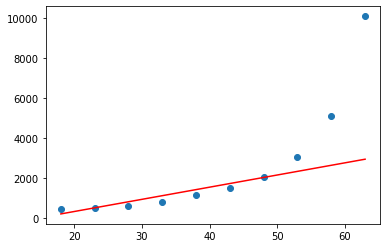

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor_linear.predict(X), color = 'red')
regressor_linear.score(X, y)

### kernel poly

In [7]:
# kernel poly
regressor_poly = SVR(kernel = 'poly', degree = 3, gamma = 'auto')
regressor_poly.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.6275190348194816

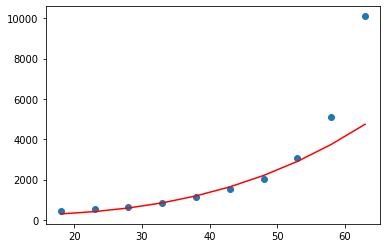

In [8]:
plt.scatter(X, y)
plt.plot(X, regressor_poly.predict(X), color = 'red')
regressor_poly.score(X, y)

### kernel rbf

In [9]:
# kernel rbf
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [10]:
regressor_rbf = SVR(kernel = 'rbf', gamma = 'auto')
regressor_rbf.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.7561578176049305

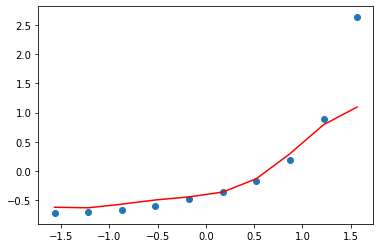

In [11]:
plt.scatter(X, y)
plt.plot(X, regressor_rbf.predict(X), color = 'red')
regressor_rbf.score(X, y)

In [12]:
previsao1 = scaler_y.inverse_transform(regressor_linear.predict(scaler_x.transform(np.array(40).reshape(1, -1))))
previsao2 = scaler_y.inverse_transform(regressor_poly.predict(scaler_x.transform(np.array(40).reshape(1, -1))))
previsao3 = scaler_y.inverse_transform(regressor_rbf.predict(scaler_x.transform(np.array(40).reshape(1, -1))))

## Base `house_prices`

In [15]:
base = pd.read_csv(file_path + 'house-prices.csv')

X = base.iloc[:, 3:19].values
y = base.iloc[:, 2:3].values

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

In [18]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)
print("Score Treinamento", score)

/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score Treinamento 0.8123465093269253


In [ ]:
regressor.score(X_teste, y_teste)

In [ ]:
previsoes = regressor.predict(X_teste)
y_teste = scaler_y.inverse_transform(y_teste)
previsoes = scaler_y.inverse_transform(previsoes)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste, previsoes)

## Base English ML-AZ `Position_Salaries`

In [20]:
# Importing the dataset
dataset = pd.read_csv(file_path + 'Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [21]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred)

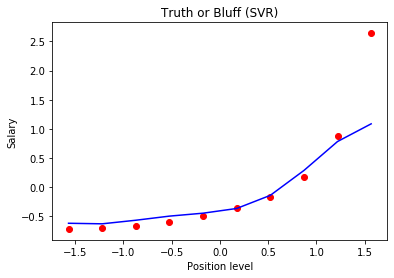

In [23]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

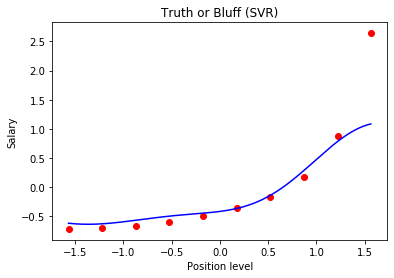

In [24]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Questions English ML-AZ SVR

### SVR Intuition

When should I use SVR?

You should use SVR if a linear model like linear regression doesn’t fit very well your data. This would mean
you are dealing with a non linear problem, where your data is not linearly distributed. Therefore in that
case SVR could be a much better solution.

I didn’t understand the Intuition Lecture. Am I in trouble?

Not at all. SVR is a pretty abstract model and besides it is not that commonly used. What you must rather
understand is the SVM model, which you will see in Part 3 - Classification. Then once you understand the
SVM model, you will get a better grasp of the SVR model, since the SVR is simply the SVM for Regression.
However we wanted to include SVR in this course to give you an extra option in your Machine Learning
toolkit.

### SVR in Python

Why do we need to ’sc_Y.inverse_transform’ ?

We need the inverse_transform method to go back to the original scale. Indeed we applied feature scaling
so we get this scale around 0 and if we make a prediction without inversing the scale we will get the
scaled predicted salary. And of course we want the real salary, not the scaled one, so we have to use
’sc_Y.inverse_transform’. Also what is important to understand is that ’transform’ and ’inverse_transform’
are paired methods.